Get a list of Kegg orthologies based on search terms relating to siderophores



## Setup

In [183]:
import pandas as pd
from collections import * 
import os 
import re
import json
from time import time
import numpy as np
import tarfile
import gzip
import itertools
import glob
import matplotlib.pyplot as plt
import numpy as np

In [124]:
os.getcwd()

'/scratch/bgrodner'

In [3]:
workdir = '/scratch/bgrodner'
os.chdir(workdir)


In [4]:
os.getcwd()

'/scratch/bgrodner'

In [5]:
os.listdir()

['.DS_Store',
 '._.DS_Store',
 'repo_armbrust_metat_search',
 'containers',
 '._ko00001.json',
 'iron_ko_contigs']

## Get database searcher

Copied from https://www.biostars.org/p/492324/

Download the json of kegg orthologies at https://www.kegg.jp/kegg-bin/get_htext?ko00001.keg

Get dataframe

In [7]:
ko_fn = "iron_ko_contigs/ko00001.json"
database = list()
for _, v in pd.read_json(ko_fn).iterrows():
    d = v["children"]
    cat_1 = d["name"]
    for child_1 in d["children"]:
        cat_2 = child_1["name"] # Module?
        for child_2 in child_1["children"]:
            cat_3 = child_2["name"]
            if "children" in child_2:
                for child_3 in child_2["children"]:
                    cat_4 = child_3["name"]
                    fields = [cat_1, cat_2, cat_3, cat_4]
                    database.append(fields)
df_kegg = pd.DataFrame(database, columns=["Level_A", "Level_B", "Level_C", "Level_D"])
df_kegg.shape


(61993, 4)

In [8]:
df_kegg[:5]

,Level_A,Level_B,Level_C,Level_D
0,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K00844 HK; hexokinase [EC:2.7.1.1]
1,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K12407 GCK; glucokinase [EC:2.7.1.2]
2,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K00845 glk; glucokinase [EC:2.7.1.2]
3,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],K25026 glk; glucokinase [EC:2.7.1.2]
4,09100 Metabolism,09101 Carbohydrate metabolism,00010 Glycolysis / Gluconeogenesis [PATH:ko00010],"K01810 GPI, pgi; glucose-6-phosphate isomeras..."


### KO search

Build KO dictionary

In [9]:
ld = df_kegg['Level_D'].values
ld[:5]

array(['K00844  HK; hexokinase [EC:2.7.1.1]',
       'K12407  GCK; glucokinase [EC:2.7.1.2]',
       'K00845  glk; glucokinase [EC:2.7.1.2]',
       'K25026  glk; glucokinase [EC:2.7.1.2]',
       'K01810  GPI, pgi; glucose-6-phosphate isomerase [EC:5.3.1.9]'],
      dtype=object)

In [10]:
dict_ko_name = {}
for name in ld:
    ko = re.search(r"^\w+",name)[0]
    dict_ko_name[ko] = name

In [11]:
dict_ko_name['K00844']

'K00844  HK; hexokinase [EC:2.7.1.1]'

Build KO keyword search dictionary

In [12]:
[s for s in re.split(';|,|/|\s', 'K00844  HK; abcd/hexokinase [EC:2.7.1.1]') if s]

['K00844', 'HK', 'abcd', 'hexokinase', '[EC:2.7.1.1]']

In [13]:
dict_search_result = defaultdict(list)
for result in ld:
    r_split = [s for s in re.split(';|,|-|\(|\)|/|\s', result) if s]
    for search in r_split:
        dict_search_result[search].append(result)

Get siderophore KOs

In [14]:
sidero_results = dict_search_result['siderophore']
sidero_results

['K25286  fagD, cchF, irp1A, piaA; iron-siderophore transport system substrate-binding protein',
 'K23186  fepD, fagA, cchC, desH; iron-siderophore transport system permease protein',
 'K23187  fepG, fagB, cchD, desG; iron-siderophore transport system permease protein',
 'K23188  fepC, fagC, cchE, desF; iron-siderophore transport system ATP-binding protein [EC:7.2.2.17 7.2.2.-]',
 'K25286  fagD, cchF, irp1A, piaA; iron-siderophore transport system substrate-binding protein',
 'K23186  fepD, fagA, cchC, desH; iron-siderophore transport system permease protein',
 'K23187  fepG, fagB, cchD, desG; iron-siderophore transport system permease protein',
 'K23188  fepC, fagC, cchE, desF; iron-siderophore transport system ATP-binding protein [EC:7.2.2.17 7.2.2.-]',
 'K25109  sirA, fecB, cbrA; iron-siderophore transport system substrate-binding protein',
 'K25110  sirB, fecC, cbrB; iron-siderophore transport system permease protein',
 'K25111  sirC, fecD, cbrC; iron-siderophore transport system p

In [15]:
sidero_KOs = set([re.search(r"^\w+",r)[0] for r in sidero_results])
sidero_KOs

{'K08197',
 'K08225',
 'K16090',
 'K23186',
 'K23187',
 'K23188',
 'K25109',
 'K25110',
 'K25111',
 'K25130',
 'K25282',
 'K25283',
 'K25284',
 'K25285',
 'K25286'}

Enterobactin

In [16]:
enterobactin_results = dict_search_result['enterobactin']
enterobactin_results

['K02362  entD, pptT; enterobactin synthetase component D / holo-[acyl-carrier protein] synthase [EC:6.3.2.14 2.7.8.7]',
 'K02362  entD, pptT; enterobactin synthetase component D / holo-[acyl-carrier protein] synthase [EC:6.3.2.14 2.7.8.7]',
 'K23185  fepB; ferric enterobactin transport system substrate-binding protein',
 'K18895  iroC; ATP-binding cassette, subfamily B, salmochelin/enterobactin exporter',
 'K19611  fepA, pfeA, iroN, pirA; ferric enterobactin receptor',
 'K02362  entD, pptT; enterobactin synthetase component D / holo-[acyl-carrier protein] synthase [EC:6.3.2.14 2.7.8.7]',
 'K18895  iroC; ATP-binding cassette, subfamily B, salmochelin/enterobactin exporter',
 'K23185  fepB; ferric enterobactin transport system substrate-binding protein',
 'K08225  entS; MFS transporter, ENTS family, enterobactin (siderophore) exporter',
 'K19611  fepA, pfeA, iroN, pirA; ferric enterobactin receptor',
 'K23725  iroB; enterobactin C-glucosyltransferase [EC:2.4.1.369]',
 'K07214  fes; iron

In [17]:
enterobactin_KOs = set([re.search(r"^\w+",r)[0] for r in enterobactin_results])
enterobactin_KOs

{'K02362',
 'K07214',
 'K08225',
 'K18895',
 'K19611',
 'K23185',
 'K23722',
 'K23725'}

Iron transport

In [140]:
transport_results = dict_search_result['transport']
transporter_results = dict_search_result['transporter']
iron_results = dict_search_result['iron']
ferric_results = dict_search_result['ferric']

transport_KOs = set([re.search(r"^\w+",r)[0] for r in transport_results])
transporter_KOs = set([re.search(r"^\w+",r)[0] for r in transporter_results])
iron_KOs = set([re.search(r"^\w+",r)[0] for r in iron_results])
ferric_KOs = set([re.search(r"^\w+",r)[0] for r in ferric_results])

iron_transport_KOs = (    
    (transport_KOs & iron_KOs) | 
    (transporter_KOs & iron_KOs) | 
    (transport_KOs & ferric_KOs) | 
    (transporter_KOs & ferric_KOs)
)
iron_transport_KOs

{'K02010',
 'K02011',
 'K02012',
 'K02013',
 'K02015',
 'K02016',
 'K02068',
 'K02069',
 'K04758',
 'K04759',
 'K07243',
 'K07490',
 'K09818',
 'K09819',
 'K09820',
 'K10123',
 'K10829',
 'K11604',
 'K11605',
 'K11606',
 'K11607',
 'K11704',
 'K11705',
 'K11706',
 'K11707',
 'K11708',
 'K11709',
 'K11710',
 'K12346',
 'K14685',
 'K15113',
 'K19791',
 'K19792',
 'K22736',
 'K22737',
 'K23181',
 'K23182',
 'K23183',
 'K23184',
 'K23185',
 'K23186',
 'K23187',
 'K23188',
 'K23227',
 'K23228',
 'K25109',
 'K25110',
 'K25111',
 'K25130',
 'K25282',
 'K25283',
 'K25284',
 'K25285',
 'K25286',
 'K25287',
 'K25288',
 'K25289',
 'K25290',
 'K25308'}

Ferritin

In [141]:
ferritin_results = dict_search_result['ferritin']
bacterioferritin_results = dict_search_result['bacterioferritin']

ferritin_KOs = set([re.search(r"^\w+",r)[0] for r in ferritin_results])
bacterioferritin_KOs = set([re.search(r"^\w+",r)[0] for r in bacterioferritin_results])

ferritin_KOs = ferritin_KOs | bacterioferritin_KOs

ferritin_results, bacterioferritin_results, ferritin_KOs

(['K00522  FTH1; ferritin heavy chain [EC:1.16.3.1]',
  'K13625  FTL; ferritin light chain',
  'K18495  FTMT; ferritin, mitochondrial [EC:1.16.3.1]',
  'K00522  FTH1; ferritin heavy chain [EC:1.16.3.1]',
  'K13625  FTL; ferritin light chain',
  'K18495  FTMT; ferritin, mitochondrial [EC:1.16.3.1]',
  'K00522  FTH1; ferritin heavy chain [EC:1.16.3.1]',
  'K13625  FTL; ferritin light chain',
  'K00522  FTH1; ferritin heavy chain [EC:1.16.3.1]',
  'K13625  FTL; ferritin light chain',
  'K00522  FTH1; ferritin heavy chain [EC:1.16.3.1]',
  'K13625  FTL; ferritin light chain',
  'K02217  ftnA, ftn; ferritin [EC:1.16.3.2]',
  'K02255  ftnB; ferritin-like protein 2'],
 ['K03594  bfr; bacterioferritin [EC:1.16.3.1]',
  'K22336  bfrB; bacterioferritin B [EC:1.16.3.1]',
  'K02192  bfd; bacterioferritin-associated ferredoxin'],
 {'K00522',
  'K02192',
  'K02217',
  'K02255',
  'K03594',
  'K13625',
  'K18495',
  'K22336'})

ZIP family

In [142]:
zinc_results = dict_search_result['zinc']

zinc_KOs = set([re.search(r"^\w+",r)[0] for r in zinc_results])

zinc_transporter_KOs = (transporter_KOs & zinc_KOs)
zinc_transporter_KOs

{'K07238',
 'K14688',
 'K14689',
 'K14690',
 'K14691',
 'K14692',
 'K14693',
 'K14694',
 'K14695',
 'K14696',
 'K14697',
 'K14709',
 'K14710',
 'K14711',
 'K14712',
 'K14713',
 'K14714',
 'K14715',
 'K14716',
 'K14717',
 'K14718',
 'K14719',
 'K14720',
 'K16074',
 'K16267'}

Transferrin

In [143]:
transferrin_results = dict_search_result['transferrin']

transferrin_KOs = set([re.search(r"^\w+",r)[0] for r in transferrin_results])
transferrin_results, transferrin_KOs

(['K06503  TFRC, CD71; transferrin receptor',
  'K14736  TF; transferrin',
  'K23910  TFR2; transferrin receptor protein 2',
  'K06503  TFRC, CD71; transferrin receptor',
  'K14736  TF; transferrin',
  'K06503  TFRC, CD71; transferrin receptor',
  'K06503  TFRC, CD71; transferrin receptor',
  'K06503  TFRC, CD71; transferrin receptor',
  'K14736  TF; transferrin',
  'K06503  TFRC, CD71; transferrin receptor',
  'K06503  TFRC, CD71; transferrin receptor',
  'K14736  TF; transferrin',
  'K06503  TFRC, CD71; transferrin receptor',
  'K23910  TFR2; transferrin receptor protein 2',
  'K16087  TC.FEV.OM3, tbpA, hemR, lbpA, hpuB, bhuR, hugA, hmbR; hemoglobin/transferrin/lactoferrin receptor protein',
  'K06503  TFRC, CD71; transferrin receptor',
  'K14736  TF; transferrin',
  'K06503  TFRC, CD71; transferrin receptor'],
 {'K06503', 'K14736', 'K16087', 'K23910'})

Ferritin

In [144]:
ferritin_results = dict_search_result['ferritin']
bacterioferritin_results = dict_search_result['bacterioferritin']

ferritin_KOs = set([re.search(r"^\w+",r)[0] for r in ferritin_results])
bacterioferritin_KOs = set([re.search(r"^\w+",r)[0] for r in bacterioferritin_results])

ferritin_KOs = ferritin_KOs | bacterioferritin_KOs

ferritin_results, bacterioferritin_results, ferritin_KOs

(['K00522  FTH1; ferritin heavy chain [EC:1.16.3.1]',
  'K13625  FTL; ferritin light chain',
  'K18495  FTMT; ferritin, mitochondrial [EC:1.16.3.1]',
  'K00522  FTH1; ferritin heavy chain [EC:1.16.3.1]',
  'K13625  FTL; ferritin light chain',
  'K18495  FTMT; ferritin, mitochondrial [EC:1.16.3.1]',
  'K00522  FTH1; ferritin heavy chain [EC:1.16.3.1]',
  'K13625  FTL; ferritin light chain',
  'K00522  FTH1; ferritin heavy chain [EC:1.16.3.1]',
  'K13625  FTL; ferritin light chain',
  'K00522  FTH1; ferritin heavy chain [EC:1.16.3.1]',
  'K13625  FTL; ferritin light chain',
  'K02217  ftnA, ftn; ferritin [EC:1.16.3.2]',
  'K02255  ftnB; ferritin-like protein 2'],
 ['K03594  bfr; bacterioferritin [EC:1.16.3.1]',
  'K22336  bfrB; bacterioferritin B [EC:1.16.3.1]',
  'K02192  bfd; bacterioferritin-associated ferredoxin'],
 {'K00522',
  'K02192',
  'K02217',
  'K02255',
  'K03594',
  'K13625',
  'K18495',
  'K22336'})

Ferredoxin (NOTE: TO BE SEPARATED INTO FERREDOXIN USE AN FERREDOXIN REPLACEMENT WITH FLAVODOXIN)

In [145]:
ferredoxin_results = dict_search_result['ferredoxin']
ferredoxin_KOs = set([re.search(r"^\w+",r)[0] for r in ferredoxin_results])

ferredoxin_KOs

{'K00169',
 'K00170',
 'K00171',
 'K00172',
 'K00174',
 'K00175',
 'K00176',
 'K00177',
 'K00179',
 'K00180',
 'K00186',
 'K00187',
 'K00188',
 'K00189',
 'K00204',
 'K00205',
 'K00284',
 'K00366',
 'K00367',
 'K00392',
 'K00528',
 'K00529',
 'K00532',
 'K00533',
 'K00534',
 'K02192',
 'K02572',
 'K02573',
 'K02574',
 'K02639',
 'K02641',
 'K03737',
 'K03855',
 'K03863',
 'K04090',
 'K04755',
 'K05337',
 'K05524',
 'K05710',
 'K06441',
 'K11107',
 'K11260',
 'K11389',
 'K14578',
 'K14581',
 'K14603',
 'K14750',
 'K15752',
 'K15753',
 'K15762',
 'K16304',
 'K17892',
 'K18087',
 'K18088',
 'K18089',
 'K18090',
 'K18227',
 'K18248',
 'K18249',
 'K18253',
 'K18254',
 'K21231',
 'K21480',
 'K21567',
 'K21834',
 'K22070',
 'K22071',
 'K22338',
 'K22339',
 'K22340',
 'K22341',
 'K22360',
 'K22362',
 'K23976',
 'K24244',
 'K24245',
 'K24530',
 'K26113',
 'K26114',
 'K26115'}

Flavodoxin

In [146]:
flavodoxin_results = dict_search_result['flavodoxin']
flavodoxin_KOs = set([re.search(r"^\w+",r)[0] for r in flavodoxin_results])

flavodoxin_results, flavodoxin_KOs

(['K03737  por, nifJ; pyruvate-ferredoxin/flavodoxin oxidoreductase [EC:1.2.7.1 1.2.7.-]',
  'K03737  por, nifJ; pyruvate-ferredoxin/flavodoxin oxidoreductase [EC:1.2.7.1 1.2.7.-]',
  'K03737  por, nifJ; pyruvate-ferredoxin/flavodoxin oxidoreductase [EC:1.2.7.1 1.2.7.-]',
  'K03737  por, nifJ; pyruvate-ferredoxin/flavodoxin oxidoreductase [EC:1.2.7.1 1.2.7.-]',
  'K03737  por, nifJ; pyruvate-ferredoxin/flavodoxin oxidoreductase [EC:1.2.7.1 1.2.7.-]',
  'K00528  fpr; ferredoxin/flavodoxin---NADP+ reductase [EC:1.18.1.2 1.19.1.1]',
  'K21567  fnr; ferredoxin/flavodoxin---NADP+ reductase [EC:1.18.1.2 1.19.1.1]',
  'K03840  fldB; flavodoxin II',
  'K03839  fldA, nifF, isiB; flavodoxin I'],
 {'K00528', 'K03737', 'K03839', 'K03840', 'K21567'})

Photosystem

In [147]:
photosystem_results = dict_search_result['photosystem']
photosystem_KOs = set([re.search(r"^\w+",r)[0] for r in photosystem_results])

photosystem_KOs

{'K02689',
 'K02690',
 'K02691',
 'K02692',
 'K02693',
 'K02694',
 'K02695',
 'K02696',
 'K02697',
 'K02698',
 'K02699',
 'K02700',
 'K02701',
 'K02702',
 'K02703',
 'K02704',
 'K02705',
 'K02706',
 'K02707',
 'K02708',
 'K02709',
 'K02710',
 'K02711',
 'K02712',
 'K02713',
 'K02714',
 'K02716',
 'K02717',
 'K02718',
 'K02719',
 'K02720',
 'K02721',
 'K02722',
 'K02723',
 'K02724',
 'K03541',
 'K03542',
 'K08901',
 'K08902',
 'K08903',
 'K08904',
 'K08905',
 'K08940',
 'K08941',
 'K08942',
 'K08943',
 'K14332'}

Nitrate/nitrite

In [148]:
nitrate_results = dict_search_result['nitrate']
nitrite_results = dict_search_result['nitrite']
nitrate_KOs = set([re.search(r"^\w+",r)[0] for r in nitrate_results])
nitrite_KOs = set([re.search(r"^\w+",r)[0] for r in nitrite_results])

nitrate_nitrate_KOs = nitrate_KOs | nitrite_KOs

nitrate_nitrate_KOs

{'K00360',
 'K00361',
 'K00362',
 'K00363',
 'K00366',
 'K00367',
 'K00368',
 'K00370',
 'K00371',
 'K00372',
 'K00373',
 'K00374',
 'K02567',
 'K02568',
 'K02570',
 'K02571',
 'K02575',
 'K02598',
 'K03385',
 'K04017',
 'K04018',
 'K07673',
 'K07674',
 'K07684',
 'K07685',
 'K10534',
 'K10850',
 'K15576',
 'K15577',
 'K15578',
 'K15579',
 'K15864',
 'K15876',
 'K17877',
 'K19343',
 'K21563',
 'K21990',
 'K22962',
 'K26138',
 'K26139',
 'K26548',
 'K26549',
 'K26551',
 'K26552',
 'K26553',
 'K26554',
 'K26562',
 'K26563'}

Glutamate synthase

In [149]:
glutamate_results = dict_search_result['glutamate']
synthase_results = dict_search_result['synthase']

glutamate_KOs = set([re.search(r"^\w+",r)[0] for r in glutamate_results])
synthase_KOs = set([re.search(r"^\w+",r)[0] for r in synthase_results])

glutamate_synthase_KOs = glutamate_KOs & synthase_KOs

glutamate_synthase_KOs

{'K00264', 'K00265', 'K00266', 'K00284', 'K09681', 'K21949', 'K24034'}

Carbonic anhydrase

In [150]:
carbonic_results = dict_search_result['carbonic']
anhydrase_results = dict_search_result['anhydrase']

carbonic_KOs = set([re.search(r"^\w+",r)[0] for r in carbonic_results])
anhydrase_KOs = set([re.search(r"^\w+",r)[0] for r in anhydrase_results])

carbonic_anhydrase_KOs = carbonic_KOs & anhydrase_KOs

carbonic_anhydrase_KOs

{'K01672', 'K01673', 'K01674', 'K01726', 'K01743', 'K18245', 'K18246'}

bicarbonate

In [151]:
bicarbonate_results = dict_search_result['bicarbonate']
bicarbonate_KOs = set([re.search(r"^\w+",r)[0] for r in bicarbonate_results])

bicarbonate_KOs

{'K11950',
 'K11951',
 'K11952',
 'K11953',
 'K13575',
 'K13857',
 'K13858',
 'K13859',
 'K13860',
 'K13861'}

fructose bisphosphatase

In [152]:
fructose_results = dict_search_result['fructose']
bisphosphatase_results = dict_search_result['bisphosphatase']

fructose_KOs = set([re.search(r"^\w+",r)[0] for r in fructose_results])
bisphosphatase_KOs = set([re.search(r"^\w+",r)[0] for r in bisphosphatase_results])

fructose_bisphosphatase_KOs = fructose_KOs & bisphosphatase_KOs

fructose_bisphosphatase_KOs

{'K01086', 'K02446', 'K03841', 'K04041', 'K11532', 'K14634'}

fructose bisphosphatase

Manual addition

In [153]:
manual_results = [
    'K13255 fhuF; ferric iron reductase protein FhuF',
    'K16088 TC.FEV.OM1, fhuE, fpvA, fptA; outer-membrane receptor for ferric coprogen and ferric-rhodotorulic acid',
    'K23721 iroE; apo-salmochelin esterase [EC:3.1.1.107]',
    'K23723 iroD; iron(III)-salmochelin esterase [EC:3.1.1.109]',
    'K03832 tonB; periplasmic protein TonB',
    'K05368 fre, ubiB; NAD(P)H-flavin reductase [EC:1.5.1.41]',
    'K07230 p19, ftrA; periplasmic iron binding protein',    
    'K12347 SLC11A1, NRAMP1; natural resistance-associated macrophage protein 1',
    'K21398 SLC11A2, DMT1, NRAMP2; natural resistance-associated macrophage protein 2',
    'K03322 mntH; manganese transport protein',
    'K21398 SLC11A2, DMT1, NRAMP2; natural resistance-associated macrophage protein 2',
    'K26562 NPF5, NRT1, NAET; MFS transporter, POT/PTR family, peptide/nitrate/nicotianamine transporter',
    'K22552 mmcO; multicopper oxidase [EC:1.16.3.1]',
    'K22350 mcoA; manganese oxidase [EC:1.16.3.3]',
    'K12243 pchR; AraC family transcriptional regulator, transcriptional activator of the genes for pyochelin and ferripyochelin receptors',
    'K05374 irp4, ybtT; yersiniabactin synthetase, thioesterase component',
    'K15721 fyuA; pesticin/yersiniabactin receptor',
    'K08906 petJ; cytochrome c6',
    'K02638 petE; plastocyanin',
    'K03320 amt, AMT, MEP; ammonium transporter, Amt family',
    'K11959 urtA; urea transport system substrate-binding protein',
    'K01595 ppc; phosphoenolpyruvate carboxylase [EC:4.1.1.31]',
    'K00592 RBCMT; [ribulose-bisphosphate carboxylase]/[fructose-bisphosphate aldolase]-lysine N-methyltransferase [EC:2.1.1.127 2.1.1.259]',
    'K01601 rbcL, cbbL; ribulose-bisphosphate carboxylase large chain [EC:4.1.1.39]',
    'K01602 rbcS, cbbS; ribulose-bisphosphate carboxylase small chain [EC:4.1.1.39]',
    'K27935 rbcX; RuBisCO chaperone RbcX',
    'K00927 PGK, pgk; phosphoglycerate kinase [EC:2.7.2.3]',
    'K05715 2PGK; 2-phosphoglycerate kinase [EC:2.7.2.16]',
    'K01803 TPI, tpiA; triosephosphate isomerase (TIM) [EC:5.3.1.1]',
    'K25224 gapdh; glyceraldehyde-3-phosphate dehydrogenase (arsenate-transferring) [EC:1.2.1.107]',
    'K00134 GAPDH, gapA; glyceraldehyde 3-phosphate dehydrogenase (phosphorylating) [EC:1.2.1.12]',
    'K00615 E2.2.1.1, tktA, tktB; transketolase [EC:2.2.1.1]',
    'K01783 rpe, RPE; ribulose-phosphate 3-epimerase [EC:5.1.3.1]',
    'K00855 PRK, prkB; phosphoribulokinase [EC:2.7.1.19]',
    'K01623 ALDO; fructose-bisphosphate aldolase, class I [EC:4.1.2.13]',
    'K01624 FBA, fbaA; fructose-bisphosphate aldolase, class II [EC:4.1.2.13]',
    'K11645 fbaB; fructose-bisphosphate aldolase, class I [EC:4.1.2.13]',
    'K03699 tlyC; magnesium and cobalt exporter, CNNM family',
    'K16302 CNNM; metal transporter CNNM',
    'K00518 sodN; nickel superoxide dismutase [EC:1.15.1.1]',
    'K04564 SOD2; superoxide dismutase, Fe-Mn family [EC:1.15.1.1]',
    'K04565 SOD1; superoxide dismutase, Cu-Zn family [EC:1.15.1.1]',
    'K04569 CCS; copper chaperone for superoxide dismutase',
    'K16627 SOD3; superoxide dismutase, Cu-Zn family [EC:1.15.1.1]',
    'K00909 GRK1_7; rhodopsin kinase [EC:2.7.11.14]',
    'K04250 RHO, OPN2; rhodopsin',
    'K04641 bop; bacteriorhodopsin',
    'K04642 hop; halorhodopsin',
    'K23306 brz; bacteriorhodopsin-regulating zinc finger protein',
    'K01012 bioB; biotin synthase [EC:2.8.1.6]',
    'K18609 pldh; pyridoxal 4-dehydrogenase [EC:1.1.1.107]',
    'K00941 thiD; hydroxymethylpyrimidine/phosphomethylpyrimidine kinase [EC:2.7.1.49 2.7.4.7]',
    'K03147 thiC; phosphomethylpyrimidine synthase [EC:4.1.99.17]',
]
manual_KOs = set([re.search(r"^\w+",r)[0] for r in manual_results])
manual_KOs

{'K00134',
 'K00518',
 'K00592',
 'K00615',
 'K00855',
 'K00909',
 'K00927',
 'K00941',
 'K01012',
 'K01595',
 'K01601',
 'K01602',
 'K01623',
 'K01624',
 'K01783',
 'K01803',
 'K02638',
 'K03147',
 'K03320',
 'K03322',
 'K03699',
 'K03832',
 'K04250',
 'K04564',
 'K04565',
 'K04569',
 'K04641',
 'K04642',
 'K05368',
 'K05374',
 'K05715',
 'K07230',
 'K08906',
 'K11645',
 'K11959',
 'K12243',
 'K12347',
 'K13255',
 'K15721',
 'K16088',
 'K16302',
 'K16627',
 'K18609',
 'K21398',
 'K22350',
 'K22552',
 'K23306',
 'K23721',
 'K23723',
 'K25224',
 'K26562',
 'K27935'}

### Pathway search

Build search dictionary

In [154]:
lc = df_kegg[['Level_C','Level_D']].values
lc[:5]

array([['00010 Glycolysis / Gluconeogenesis [PATH:ko00010]',
        'K00844  HK; hexokinase [EC:2.7.1.1]'],
       ['00010 Glycolysis / Gluconeogenesis [PATH:ko00010]',
        'K12407  GCK; glucokinase [EC:2.7.1.2]'],
       ['00010 Glycolysis / Gluconeogenesis [PATH:ko00010]',
        'K00845  glk; glucokinase [EC:2.7.1.2]'],
       ['00010 Glycolysis / Gluconeogenesis [PATH:ko00010]',
        'K25026  glk; glucokinase [EC:2.7.1.2]'],
       ['00010 Glycolysis / Gluconeogenesis [PATH:ko00010]',
        'K01810  GPI, pgi; glucose-6-phosphate isomerase [EC:5.3.1.9]']],
      dtype=object)

In [155]:
re.search(r"^\w+", '00010 Glycolysis / Gluconeogenesis [PATH:ko00010]')[0]

'00010'

In [156]:
dict_path_result = defaultdict(list)
for path_, result in lc:
    path = re.search(r"^\w+", path_)[0]
    dict_path_result[path].append(result)

Get siderophore synthesis KOs

In [157]:
sidero_path = '01053'

In [158]:
sidero_path_results = dict_path_result[sidero_path]
sidero_path_results

['K01851  pchA; salicylate biosynthesis isochorismate synthase [EC:5.4.4.2]',
 'K02552  menF; menaquinone-specific isochorismate synthase [EC:5.4.4.2]',
 'K02361  entC; isochorismate synthase [EC:5.4.4.2]',
 'K01252  entB, dhbB, vibB, mxcF; bifunctional isochorismate lyase / aryl carrier protein [EC:3.3.2.1 6.3.2.14]',
 'K00216  entA; 2,3-dihydro-2,3-dihydroxybenzoate dehydrogenase [EC:1.3.1.28]',
 'K02362  entD, pptT; enterobactin synthetase component D / holo-[acyl-carrier protein] synthase [EC:6.3.2.14 2.7.8.7]',
 'K02363  entE, dhbE, vibE, mxcE; 2,3-dihydroxybenzoate---[aryl-carrier protein] ligase [EC:6.3.2.14 6.2.1.71]',
 'K02364  entF; L-serine---[L-seryl-carrier protein] ligase [EC:6.3.2.14 6.2.1.72]',
 'K24147  entH; proofreading thioesterase EntH',
 'K04778  vibH; vibriobactin synthetase',
 'K12237  vibF; nonribosomal peptide synthetase VibF',
 'K04780  dhbF; glyine---[glycyl-carrier protein] ligase [EC:6.2.1.66]',
 'K15653  mxcG; nonribosomal peptide synthetase MxcG',
 'K156

In [159]:
sidero_path_KOs = set([re.search(r"^\w+",r)[0] for r in sidero_path_results])
sidero_path_KOs

{'K00216',
 'K01252',
 'K01851',
 'K02361',
 'K02362',
 'K02363',
 'K02364',
 'K02552',
 'K04778',
 'K04780',
 'K04781',
 'K04782',
 'K04783',
 'K04784',
 'K04785',
 'K04786',
 'K04787',
 'K04788',
 'K04789',
 'K04790',
 'K04791',
 'K04792',
 'K04793',
 'K12237',
 'K12238',
 'K12239',
 'K12240',
 'K12241',
 'K15652',
 'K15653',
 'K15681',
 'K24108',
 'K24109',
 'K24110',
 'K24111',
 'K24112',
 'K24147'}

### Merge KO lists

In [166]:
merged_KOs = (
    sidero_KOs | 
    enterobactin_KOs | 
    iron_transport_KOs | 
    ferritin_KOs | 
    zinc_transporter_KOs | 
    transferrin_KOs | 
    ferritin_KOs | 
    ferredoxin_KOs | 
    flavodoxin_KOs |
    photosystem_KOs |
    nitrate_nitrate_KOs | 
    glutamate_synthase_KOs | 
    carbonic_anhydrase_KOs | 
    bicarbonate_KOs | 
    fructose_bisphosphatase_KOs | 
    manual_KOs | 
    sidero_path_KOs
)
len(merged_KOs)

395

Write to file

In [250]:
with open('list_KOs.txt', 'w') as f:
    for line in list(merged_KOs):
        f.write(f"{line}\n")

## Search Gradients assemblies

### Test search

Get G1 filenames

In [18]:
kofam_dir = '/mnt/nfs/projects/armbrust-metat/gradients1/g1_station_ns_metat/assemblies/kofam'
kofam_fns = os.listdir(kofam_dir)
kofam_fns

['G1NS.S11C1_3um.kofam2021.domtblout.tab',
 'G1NS.S11C1_0_2um.kofam2021.csv',
 'G1NS.S09C1_0_2um.kofam2021.domtblout.tab',
 'G1NS.S06C1_3um.kofam2021.domtblout.tab',
 'G1NS.S11C1_3um.kofam2021.csv',
 'G1NS.S02C1_3um.kofam2021.csv',
 'G1NS.S08C1_0_2um.kofam2021.domtblout.tab',
 'G1NS.S10_0_2um.kofam2021.domtblout.tab',
 'G1NS.S10_0_2um.kofam2021.csv',
 'G1NS.S06C1_0_2um.kofam2021.csv',
 'G1NS.S06C1_3um.kofam2021.csv',
 'G1NS.S12C1_3um.kofam2021.csv',
 'G1NS.S08C1_3um.kofam2021.csv',
 'G1NS.S06C1_0_2um.kofam2021.domtblout.tab',
 'G1NS.S09C1_0_2um.kofam2021.csv',
 'G1NS.S04C1_3um.kofam2021.csv',
 'G1NS.S13C1_0_2um.kofam2021.domtblout.tab',
 'G1NS.S13C1_3um.kofam2021.domtblout.tab',
 'G1NS.S12C1_0_2um.kofam2021.domtblout.tab',
 'G1NS.S08C1_3um.kofam2021.domtblout.tab',
 'G1NS.S13C1_0_2um.kofam2021.csv',
 'G1NS.S04C1_3um.kofam2021.domtblout.tab',
 'G1NS.S02C1_3um.kofam2021.domtblout.tab',
 'G1NS.S11C1_0_2um.kofam2021.domtblout.tab',
 'G1NS.S04C1_0_2um.kofam2021.domtblout.tab',
 'G1NS.S08C1_

In [19]:
kofam_fns_csv = [f for f in kofam_fns if '.csv' in f]
kofam_fns_csv

['G1NS.S11C1_0_2um.kofam2021.csv',
 'G1NS.S11C1_3um.kofam2021.csv',
 'G1NS.S02C1_3um.kofam2021.csv',
 'G1NS.S10_0_2um.kofam2021.csv',
 'G1NS.S06C1_0_2um.kofam2021.csv',
 'G1NS.S06C1_3um.kofam2021.csv',
 'G1NS.S12C1_3um.kofam2021.csv',
 'G1NS.S08C1_3um.kofam2021.csv',
 'G1NS.S09C1_0_2um.kofam2021.csv',
 'G1NS.S04C1_3um.kofam2021.csv',
 'G1NS.S13C1_0_2um.kofam2021.csv',
 'G1NS.S08C1_0_2um.kofam2021.csv',
 'G1NS.S14C1_3um.kofam2021.csv',
 'G1NS_kofam2021_ALL_intermediate.csv',
 'G1NS.S09C1_3um.kofam2021.csv',
 'G1NS_kofam2021_ALL.csv',
 'G1NS.S13C1_3um.kofam2021.csv',
 'G1NS.S02C1_0_2um.kofam2021.csv',
 'G1NS.S04C1_0_2um.kofam2021.csv',
 'G1NS.S14C1_0_2um.kofam2021.csv',
 'G1NS.S12C1_0_2um.kofam2021.csv']

See if there are any siderophore transporter kos

In [239]:
fn = 'G1NS.S11C1_3um.kofam2021.csv'
fn_full = kofam_dir + '/' + fn

dict_transp_ko_contig = defaultdict(list)
dict_synth_ko_contig = defaultdict(list)
i = 0
times = []
with open(fn_full,'r') as f:
    for line in f:
        if i < 50000:
            t0 = time()
            l = line.split(',')
            l = list(filter(None, l))
            ko = l[4].replace('"','')
            if ko in merged_KOs:
                contig = l[1].replace('"','')
                dict_transp_ko_contig[ko].append(contig)
            t1 = time()
            times.append(t1-t0)
            i += 1
        else:
            break


np.mean(times)

1.6600322723388671e-06

In [247]:
(582792914 * 2.513885498046875e-06) / 60

24.41791091448466

In [ ]:
[[dict_ko_name[k], len(v)] for k, v in dict_transp_ko_contig.items()]

[['K00216  entA; 2,3-dihydro-2,3-dihydroxybenzoate dehydrogenase [EC:1.3.1.28]',
  1519],
 ['K01252  entB, dhbB, vibB, mxcF; bifunctional isochorismate lyase / aryl carrier protein [EC:3.3.2.1 6.3.2.14]',
  45],
 ['K01851  pchA; salicylate biosynthesis isochorismate synthase [EC:5.4.4.2]',
  79],
 ['K02361  entC; isochorismate synthase [EC:5.4.4.2]', 81],
 ['K02362  entD, pptT; enterobactin synthetase component D / holo-[acyl-carrier protein] synthase [EC:6.3.2.14 2.7.8.7]',
  4],
 ['K02363  entE, dhbE, vibE, mxcE; 2,3-dihydroxybenzoate---[aryl-carrier protein] ligase [EC:6.3.2.14 6.2.1.71]',
  1838],
 ['K02364  entF; L-serine---[L-seryl-carrier protein] ligase [EC:6.3.2.14 6.2.1.72]',
  2807],
 ['K02552  menF; menaquinone-specific isochorismate synthase [EC:5.4.4.2]',
  79],
 ['K04778  vibH; vibriobactin synthetase', 18],
 ['K04780  dhbF; glyine---[glycyl-carrier protein] ligase [EC:6.2.1.66]',
  2282],
 ['K04781  mbtI, irp9, ybtS; salicylate synthetase [EC:5.4.4.2 4.2.99.21]',
  73],

Save dicts to json

In [118]:
groups = ['transporters','synthesis']
dicts = [dict_transp_ko_contig, dict_synth_ko_contig]
sidero_ko_dir = 'siderophore_ko_contigs'
bn = os.path.splitext(fn)[0]
out_dir = workdir + '/' + sidero_ko_dir + '/' + bn 
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    print("Made dir:", out_dir)

for group, d in zip(groups, dicts):
    out_fn = (
        out_dir + '/' 
        + bn + '.siderophore_' + group + '.dict_ko_contig.json'
    )
    with open(out_fn, 'w') as f:
        json.dump(d, f, sort_keys=True, indent=4, separators=(',', ': '))

### Search all gradients (non-selected)

Check dirs

In [20]:
gradients_dir = '/mnt/nfs/projects/armbrust-metat'
grad_kofam_dirnames = [
    'gradients3/g3_uw_pa_pm_metat/assemblies/annotations/kofam',
    'gradients3/g3_uw_pa_metat/assemblies/annotations/kofam',
    'gradients3/g3_diel_pa_metat/assemblies/annotations/kofam',
    'gradients3/g3_uw_ns_metat/assemblies/kofam',
    'gradients1/g1_station_ns_metat/assemblies/kofam',
    'gradients1/g1_station_pa_metat/assemblies/annotations/kofam',
    'gradients2/g2_dcm_rr_pa_metat/assemblies/kofam',
    'gradients2/g2_station_pa_metat/assemblies/annotations/kofam',
    'gradients2/g2_station_ns_metat/assemblies/kofam',
    'scope_diel/diel_pa_metat/assemblies/annotations/kofam',
]
for d in grad_kofam_dirnames:
    if not os.path.exists(gradients_dir + '/' + d):
        print(d)

Parse each file type

In [30]:
def split_line(line):
    """
    Split line string read from file

    Args:
        line (str): Unparsed line from the file.
    Returns:
        list: Split line.
    """
    return re.split(r'\t|,', line)

def open_file(fn):
    """
    Open text file if gzipped, or not

    Args:
        fn (str): Path to metat file.

    Returns:
        _io.TextIOWrapper: Metat file.
    """
    # Get file type
    ext = os.path.splitext(fn)[1]
    # Unzip to read
    if ext == '.gz':
        return gzip.open(fn, 'rt')
    else:
        return open(fn, 'r')

def get_key_value_idx(fn, name_key, name_value, cln=1):
    """
    Get indices for keys and values in parsed metat file.

    Args:
        fn (str): Path to metat file.
        names_key (str): Column name in metat file to be used for dictionary keys.
        names_value (str): Column name in metat file to be used for dictionary values.

    Returns:
        int: Index of the key in the parsed line (parsed by ',' or '\s').
        int: Index of the mapped value in the parsed line (parsed by ',' or '\s').
    """
    f = open_file(fn)
    for _ in range(cln):
        line = f.readline()
    l = split_line(line)
    for idx, column in enumerate(l):
        # Remove extra quotes
        column = column.replace('"','').replace("'", "")
        if column == name_key:
            idx_key = idx
        elif column == name_value:
            idx_value = idx
    try:
        idx_key
    except NameError:
        raise ValueError(
            f"The provided argument -k {name_key} did not map to column names in the file.\n\
            Here is the split line (line number {cln} in the file) used to search for column names:\n\
            {l}\n\
            To change the column line specify -c <columns_line_number> in the arguments (counting starts from 1 not 0)"
        )
    try:
        idx_value
    except NameError:
        raise ValueError(
            f"The provided argument -vl {name_value} did not map to column names in the file.\n\
            Here is the split line (line number {cln} in the file) used to search for column names:\n\
            {l}\n\
            To change the column line specify -c <columns_line_number> in the arguments (counting starts from 1 not 0)"
        )
    return(idx_key, idx_value)

In [38]:
for d in grad_kofam_dirnames:
    fns = os.listdir(gradients_dir + '/' + d)
    for fn in fns:
        fn_full = gradients_dir + '/' + d + '/' + fn
        print(fn_full)
        fspl, ext = os.path.splitext(fn)
        ext2 = os.path.splitext(fspl)[1]
        if ext == '.csv' and not re.match(r"\w+_ALL$", fspl):
            # print(sum(1 for _ in open(fn_full)))
            with open(fn_full, 'r') as f:
                line = f.readline()
                l = line.split(',')
                print(l)
                # print(l[1],l[4])
                line = f.readline()
                l = line.split(',')
                print(line)
                print(l)
                # print(l[1],l[4])
        elif ext == '.gz':
            # print(sum(1 for _ in gzip.open(fn_full)))
            with gzip.open(fn_full, 'rt') as f:
                for _ in range(4):
                    line = f.readline()
                    l = re.split(r'\t|,', line)
                    l = list(filter(None, l))
                    # print(repr(line))
                    print(l)
                    # idx_key, idx_value = get_key_value_idx(fn_full, "gene name", '#', cln=1)
                    # print(l[idx_key],l[idx_value])




/mnt/nfs/projects/armbrust-metat/gradients3/g3_uw_pa_pm_metat/assemblies/annotations/kofam/NPac.G3PA_PM.bf100.id99.aa.best.kofam.incT30.csv.gz
['""', '"X"', '"aa_id"', '"KO"', '"thrshld"', '"score"', '"E-value"', '"KO_definition"\n']
['"3"', '""', '"G3.UW.PA.UW24_1.7m_PM.0.2um_TRINITY_DN1000024_c0_g1_i1_5"', '"K17579"', '"153.63"', '58.9', '"7.5e-13"', '"protein phosphatase 1 regulatory subunit 42"\n']
['"9"', '""', '"G3.UW.PA.UW24_1.7m_PM.0.2um_TRINITY_DN1000053_c0_g1_i1_1"', '"K14995"', '"210.80"', '49', '"7.1e-10"', '"solute carrier family 38 (sodium-coupled neutral amino acid transporter)', ' member 9"\n']
['"10"', '""', '"G3.UW.PA.UW24_1.7m_PM.0.2um_TRINITY_DN100006_c0_g2_i3_3"', '"K14689"', '"486.57"', '287.5', '"3.6e-82"', '"solute carrier family 30 (zinc transporter)', ' member 2"\n']
/mnt/nfs/projects/armbrust-metat/gradients3/g3_uw_pa_pm_metat/assemblies/annotations/kofam/NPac.G3PA_PM.bf100.id99.aa.tsv.gz
['#', 'gene name', 'KO', 'thrshld', 'score', 'E-value', '"KO definition

Test speed

In [249]:
nreps = 1000

for d in grad_kofam_dirnames:
    fns = os.listdir(gradients_dir + '/' + d)
    for fn in fns:
        fn_full = gradients_dir + '/' + d + '/' + fn
        print(fn_full)
        fspl, ext = os.path.splitext(fn)
        ext2 = os.path.splitext(fspl)[1]

        dict_ko_contig = defaultdict(list)

        times = []
        i = 0
        if ext == '.csv' and not re.match(r"\w+_ALL$", fspl):
            with open(fn_full, 'r') as f:
                for line in f:
                    if i < nreps:
                        t0 = time()
                        l = line.split(',')
                        ko = l[4].replace('"','')
                        # print(ko, '\t', contig)
                        if ko in merged_KOs:
                            contig = l[1].replace('"','')
                            dict_ko_contig[ko].append(contig)
                        t1 = time()
                        times.append(t1-t0)
                        i += 1
                    else:
                        break
            print(np.mean(times))
        elif ext == '.gz' and ext2 == '.tsv':
            with gzip.open(fn_full, 'rt') as f:
                for line in f:
                    if i < nreps:
                        t0 = time()
                        l = re.split(r'\s', line)
                        l = list(filter(None, l))
                        ko = l[1]
                        # print(ko, '\t', contig)
                        if ko in merged_KOs:
                            dict_ko_contig[ko].append(l[0])
                        t1 = time()
                        times.append(t1-t0)
                        i += 1
                    else:
                        break
            print(np.mean(times))


/mnt/nfs/projects/armbrust-metat/gradients3/g3_uw_pa_pm_metat/assemblies/annotations/kofam/NPac.G3PA_PM.bf100.id99.aa.best.kofam.incT30.csv.gz
/mnt/nfs/projects/armbrust-metat/gradients3/g3_uw_pa_pm_metat/assemblies/annotations/kofam/NPac.G3PA_PM.bf100.id99.aa.tsv.gz
3.2880306243896485e-06
/mnt/nfs/projects/armbrust-metat/gradients3/g3_uw_pa_metat/assemblies/annotations/kofam/zenodo_trimming
/mnt/nfs/projects/armbrust-metat/gradients3/g3_uw_pa_metat/assemblies/annotations/kofam/NPac.G3PA.kofam.tsv.gz
6.644725799560547e-06
/mnt/nfs/projects/armbrust-metat/gradients3/g3_uw_pa_metat/assemblies/annotations/kofam/NPac.G3PA.UW.bf100.id99.aa.best.Kofam.incT30.csv.gz
/mnt/nfs/projects/armbrust-metat/gradients3/g3_diel_pa_metat/assemblies/annotations/kofam/NPac.G3PA.diel.bf100.id99.aa.best.kofam.incT30.csv.gz
/mnt/nfs/projects/armbrust-metat/gradients3/g3_diel_pa_metat/assemblies/annotations/kofam/zenodo_trimming
/mnt/nfs/projects/armbrust-metat/gradients3/g3_diel_pa_metat/assemblies/annotation

In [259]:
'"abcd"'.replace('"','').replace("'", "") == 'abcd'

True

In [260]:
with open(fn_full, 'r') as f:
    print(type(f))


<class '_io.TextIOWrapper'>


In [261]:
os.path.split('abcd.ext')

('', 'abcd.ext')

Select kofam files

In [39]:
kofam_fns = [
    '/mnt/nfs/projects/armbrust-metat/gradients3/g3_uw_pa_pm_metat/assemblies/annotations/kofam/NPac.G3PA_PM.bf100.id99.aa.best.kofam.incT30.csv.gz',
    '/mnt/nfs/projects/armbrust-metat/gradients3/g3_uw_pa_metat/assemblies/annotations/kofam/zenodo_trimming/NPac.G3PA.kofam.fix.tsv.gz',
    '/mnt/nfs/projects/armbrust-metat/gradients3/g3_diel_pa_metat/assemblies/annotations/kofam/NPac.G3PA.diel.bf100.id99.aa.best.kofam.incT30.csv.gz',
    '/mnt/nfs/projects/armbrust-metat/gradients3/g3_uw_ns_metat/assemblies/kofam/G3NS_kofam2021_ALL.csv',
    '/mnt/nfs/projects/armbrust-metat/gradients1/g1_station_ns_metat/assemblies/kofam/G1NS_kofam2021_ALL.csv',
    '/mnt/nfs/projects/armbrust-metat/gradients1/g1_station_pa_metat/assemblies/annotations/kofam/NPac.G1PA.kofam.tsv.gz',
    '/mnt/nfs/projects/armbrust-metat/gradients2/g2_dcm_rr_pa_metat/assemblies/kofam/G2_DCM_assembledReads.id99.kofam2021.domtblout.tab.gz',
    '/mnt/nfs/projects/armbrust-metat/gradients2/g2_station_pa_metat/assemblies/annotations/kofam/NPac.G2PA.kofam.tsv.gz',
    '/mnt/nfs/projects/armbrust-metat/gradients2/g2_station_ns_metat/assemblies/kofam/G2NS_kofam2021_ALL.csv',
    '/mnt/nfs/projects/armbrust-metat/gradients5/incubations-RR-MIX/assemblies/assemblies_RR/kofam_RR/G5INC_RR_kofam2024_ALL.csv',
    '/mnt/nfs/projects/armbrust-metat/gradients5/incubations-RR-MIX/assemblies/assemblies_mix/kofam_mix/G5INC_mix_kofam2024_ALL.csv',
    '/mnt/nfs/projects/armbrust-metat/scope_diel/diel_pa_metat/assemblies/annotations/kofam/NPac.D1PA.diel.bf100.id99.aa.best.kofam.incT30.csv.gz',

]

In [60]:
def split_line(line, fn):
    """
    Split line string read from file

    Args:
        line (str): Unparsed line from the file.
        fn (str): Path to file.
    Returns:
        list: Split line.
    """
    fspl, ext = os.path.splitext(fn)
    if ext == '.gz':
        ext = os.path.splitext(fspl)[1]
    if ext == '.csv':
        return re.split(r',', line)
    if ext == '.tsv':
        return re.split(r'\t', line)
    if ext == '.tab':
        return re.split(r'\s+', line)
    



In [57]:
for fn in kofam_fns:
    f = open_file(fn)
    print(fn)
    for _ in range(4):
        line = f.readline()
        l = split_line(line,fn)
        # print(repr(line))
        # print(repr(l[0]))
        print(len(l), l)
        # print([repr(l_) for l_ in l])

/mnt/nfs/projects/armbrust-metat/gradients3/g3_uw_pa_pm_metat/assemblies/annotations/kofam/NPac.G3PA_PM.bf100.id99.aa.best.kofam.incT30.csv.gz
8 ['""', '"X"', '"aa_id"', '"KO"', '"thrshld"', '"score"', '"E-value"', '"KO_definition"\n']
8 ['"3"', '""', '"G3.UW.PA.UW24_1.7m_PM.0.2um_TRINITY_DN1000024_c0_g1_i1_5"', '"K17579"', '"153.63"', '58.9', '"7.5e-13"', '"protein phosphatase 1 regulatory subunit 42"\n']
9 ['"9"', '""', '"G3.UW.PA.UW24_1.7m_PM.0.2um_TRINITY_DN1000053_c0_g1_i1_1"', '"K14995"', '"210.80"', '49', '"7.1e-10"', '"solute carrier family 38 (sodium-coupled neutral amino acid transporter)', ' member 9"\n']
9 ['"10"', '""', '"G3.UW.PA.UW24_1.7m_PM.0.2um_TRINITY_DN100006_c0_g2_i3_3"', '"K14689"', '"486.57"', '287.5', '"3.6e-82"', '"solute carrier family 30 (zinc transporter)', ' member 2"\n']
/mnt/nfs/projects/armbrust-metat/gradients3/g3_uw_pa_metat/assemblies/annotations/kofam/zenodo_trimming/NPac.G3PA.kofam.fix.tsv.gz
6 ['gene name', 'KO', 'thrshld', 'score', 'E-value', 'KO 

Test file table

In [104]:
def open_file(fn):
    """
    Open text file if gzipped, or not

    Args:
        fn (str): Path to metat file.

    Returns:
        _io.TextIOWrapper: Metat file.
    """
    # Get file type
    ext = os.path.splitext(fn)[1]
    # Unzip to read
    if ext == '.gz':
        return gzip.open(fn, 'rt')
    else:
        return open(fn, 'r')


def get_key_value_idx(fn, name_key, name_value, cln=1):
    """
    Get indices for keys and values in parsed metat file.

    Args:
        fn (str): Path to metat file.
        names_key (str): Column name in metat file to be used for dictionary keys.
        names_value (str): Column name in metat file to be used for dictionary values.

    Returns:
        int: Index of the key in the parsed line (parsed by ',' or '\s').
        int: Index of the mapped value in the parsed line (parsed by ',' or '\s').
    """
    f = open_file(fn)
    for _ in range(cln):
        line = f.readline()
    l = split_line(line, fn)
    for idx, column in enumerate(l):
        # Remove extra quotes
        column = column.replace('"','').replace("'", "")
        if column == name_key:
            idx_key = idx
        elif column == name_value:
            idx_value = idx
    try:
        idx_key
    except NameError:
        raise ValueError(
            f"The provided argument -k {name_key} did not map to column names in the file.\n\
            Here is the split line (line number {cln} in the file) used to search for column names:\n\
            {l}\n\
            To change the column line, specify -c <columns_line_number> in the arguments (counting starts from 1 not 0)"
        )
    try:
        idx_value
    except NameError:
        raise ValueError(
            f"The provided argument -vl {name_value} did not map to column names in the file.\n\
            Here is the split line (line number {cln} in the file) used to search for column names:\n\
            {l}\n\
            To change the column line, specify -c <columns_line_number> in the arguments (counting starts from 1 not 0)"
        )
    return(idx_key, idx_value)

In [105]:
file_table = pd.read_csv(
    'iron_ko_contigs/file_table.csv',
    keep_default_na=False
)

for i, row in file_table.iterrows():
    f = open_file(row.fn_metat)
    print(row.fn_metat)

    for _ in range(5):
        line = f.readline()
        l = split_line(line,row.fn_metat)
        # print(repr(line))
        # print(repr(l[0]))
        print(len(l), l)
        if row.name_key and row.name_value:
            idx_key, idx_value = get_key_value_idx(
                row.fn_metat, 
                row.name_key.replace('"','').replace("'", ""), 
                row.name_value.replace('"','').replace("'", ""), 
                int(row.columns_line_number)
            )
        else:
            idx_key = int(row.idx_key)
            idx_value = int(row.idx_value)
        print(l[idx_key], l[idx_value])
        # print([repr(l_) for l_ in l])

/mnt/nfs/projects/armbrust-metat/gradients3/g3_uw_pa_pm_metat/assemblies/annotations/kofam/NPac.G3PA_PM.bf100.id99.aa.best.kofam.incT30.csv.gz
8 ['""', '"X"', '"aa_id"', '"KO"', '"thrshld"', '"score"', '"E-value"', '"KO_definition"\n']
"KO" "aa_id"
8 ['"3"', '""', '"G3.UW.PA.UW24_1.7m_PM.0.2um_TRINITY_DN1000024_c0_g1_i1_5"', '"K17579"', '"153.63"', '58.9', '"7.5e-13"', '"protein phosphatase 1 regulatory subunit 42"\n']
"K17579" "G3.UW.PA.UW24_1.7m_PM.0.2um_TRINITY_DN1000024_c0_g1_i1_5"
9 ['"9"', '""', '"G3.UW.PA.UW24_1.7m_PM.0.2um_TRINITY_DN1000053_c0_g1_i1_1"', '"K14995"', '"210.80"', '49', '"7.1e-10"', '"solute carrier family 38 (sodium-coupled neutral amino acid transporter)', ' member 9"\n']
"K14995" "G3.UW.PA.UW24_1.7m_PM.0.2um_TRINITY_DN1000053_c0_g1_i1_1"
9 ['"10"', '""', '"G3.UW.PA.UW24_1.7m_PM.0.2um_TRINITY_DN100006_c0_g2_i3_3"', '"K14689"', '"486.57"', '287.5', '"3.6e-82"', '"solute carrier family 30 (zinc transporter)', ' member 2"\n']
"K14689" "G3.UW.PA.UW24_1.7m_PM.0.2um_T

In [106]:
file_table = pd.read_csv(
    'iron_ko_contigs/file_table.csv'
)
file_table

,path_metat,fn_metat,path_targets,fn_targets,name_key,name_value,columns_line_number,idx_key,idx_value,search_output_dir
0,/mnt/nfs/projects/armbrust-metat/gradients3/g3...,NPac.G3PA_PM.bf100.id99.aa.best.kofam.incT30.c...,NaN,iron_KOs.txt,KO,aa_id,1.0,NaN,NaN,dicts_iron_KO_contig
1,/mnt/nfs/projects/armbrust-metat/gradients3/g3...,NPac.G3PA.kofam.fix.tsv.gz,NaN,iron_KOs.txt,KO,'gene name',1.0,NaN,NaN,dicts_iron_KO_contig
2,/mnt/nfs/projects/armbrust-metat/gradients3/g3...,NPac.G3PA.diel.bf100.id99.aa.best.kofam.incT30...,NaN,iron_KOs.txt,KO,aa_id,1.0,NaN,NaN,dicts_iron_KO_contig
3,/mnt/nfs/projects/armbrust-metat/gradients3/g3...,G3NS_kofam2021_ALL.csv,NaN,iron_KOs.txt,kofam,contig,1.0,NaN,NaN,dicts_iron_KO_contig
4,/mnt/nfs/projects/armbrust-metat/gradients1/g1...,G1NS_kofam2021_ALL.csv,NaN,iron_KOs.txt,kofam,contig,1.0,NaN,NaN,dicts_iron_KO_contig
5,/mnt/nfs/projects/armbrust-metat/gradients1/g1...,NPac.G1PA.kofam.tsv.gz,NaN,iron_KOs.txt,KO,'gene name',1.0,NaN,NaN,dicts_iron_KO_contig
6,/mnt/nfs/projects/armbrust-metat/gradients2/g2...,G2_DCM_assembledReads.id99.kofam2021.domtblout...,NaN,iron_KOs.txt,NaN,NaN,NaN,3.0,0.0,dicts_iron_KO_contig
7,/mnt/nfs/projects/armbrust-metat/gradients2/g2...,NPac.G2PA.kofam.tsv.gz,NaN,iron_KOs.txt,KO,'gene name',1.0,NaN,NaN,dicts_iron_KO_contig
8,/mnt/nfs/projects/armbrust-metat/gradients2/g2...,G2NS_kofam2021_ALL.csv,NaN,iron_KOs.txt,kofam,contig,1.0,NaN,NaN,dicts_iron_KO_contig
9,/mnt/nfs/projects/armbrust-metat/gradients5/in...,G5INC_RR_kofam2024_ALL.csv,NaN,iron_KOs.txt,kofam,contig,1.0,NaN,NaN,dicts_iron_KO_contig


In [123]:
fn_metat = 'NPac.G3PA.kofam.fix.tsv.gz'

str(file_table.loc[file_table.fn_metat == fn_metat,'idx_key'].values[0]) == 'nan'

True

## Check out search results

Load example json

In [126]:
path_dicts = 'iron_ko_contigs/metat_search_results/dicts_iron_KO_contig'
fn = 'NPac.G3PA.diel.bf100.id99.aa.best.kofam.incT30.csv.gz-iron_KOs.txt-dict.json'
fn_full = path_dicts + '/' + fn

with open(fn_full, 'r') as f:
    dict_ko_contig = json.load(f)

len(dict_ko_contig)


229

In [135]:
testkeys = list(dict_ko_contig.keys())
testkeys[:5]

['K00134', 'K00171', 'K00187', 'K00205', 'K00216']

In [134]:
testko = 'K00134'
testlist = dict_ko_contig[testko]
print(len(testlist))
print(dict_ko_name[testko])
testlist[:10]


17417
K00134  GAPDH, gapA; glyceraldehyde 3-phosphate dehydrogenase (phosphorylating) [EC:1.2.1.12]


['G3PA.diel.S4C11.A_TRINITY_DN100450_c1_g1_i1_5',
 'G3PA.diel.S4C11.A_TRINITY_DN103182_c0_g2_i1_2',
 'G3PA.diel.S4C11.A_TRINITY_DN10372_c0_g1_i1_4',
 'G3PA.diel.S4C11.A_TRINITY_DN10372_c0_g1_i3_5',
 'G3PA.diel.S4C11.A_TRINITY_DN10372_c0_g1_i4_4',
 'G3PA.diel.S4C11.A_TRINITY_DN10372_c0_g1_i7_5',
 'G3PA.diel.S4C11.A_TRINITY_DN10372_c1_g1_i1_5',
 'G3PA.diel.S4C11.A_TRINITY_DN10372_c1_g2_i1_6',
 'G3PA.diel.S4C11.A_TRINITY_DN1079245_c0_g1_i1_6',
 'G3PA.diel.S4C11.A_TRINITY_DN108930_c0_g1_i1_1']

In [133]:
testko = 'K00134'
testlist = dict_ko_contig[testko]
print(len(testlist))
print(dict_ko_name[testko])
testlist[:10]

'K00134  GAPDH, gapA; glyceraldehyde 3-phosphate dehydrogenase (phosphorylating) [EC:1.2.1.12]'

### What fraction of each type of ko is in each assembly?

Get filenames

In [138]:
fns = glob.glob(path_dicts + '/*')
fns

['iron_ko_contigs/metat_search_results/dicts_iron_KO_contig/NPac.G3PA.diel.bf100.id99.aa.best.kofam.incT30.csv.gz-iron_KOs.txt-dict.json',
 'iron_ko_contigs/metat_search_results/dicts_iron_KO_contig/G5INC_RR_kofam2024_ALL.csv-iron_KOs.txt-dict.json',
 'iron_ko_contigs/metat_search_results/dicts_iron_KO_contig/NPac.G3PA.kofam.fix.tsv.gz-iron_KOs.txt-dict.json',
 'iron_ko_contigs/metat_search_results/dicts_iron_KO_contig/G2_DCM_assembledReads.id99.kofam2021.domtblout.tab.gz-iron_KOs.txt-dict.json',
 'iron_ko_contigs/metat_search_results/dicts_iron_KO_contig/NPac.G3PA_PM.bf100.id99.aa.best.kofam.incT30.csv.gz-iron_KOs.txt-dict.json',
 'iron_ko_contigs/metat_search_results/dicts_iron_KO_contig/G5INC_mix_kofam2024_ALL.csv-iron_KOs.txt-dict.json',
 'iron_ko_contigs/metat_search_results/dicts_iron_KO_contig/NPac.G1PA.kofam.tsv.gz-iron_KOs.txt-dict.json',
 'iron_ko_contigs/metat_search_results/dicts_iron_KO_contig/G1NS_kofam2021_ALL.csv-iron_KOs.txt-dict.json',
 'iron_ko_contigs/metat_search_r

calculate fractions

In [175]:
# list of ko lists

list_ko_lists = [
    sidero_KOs ,
    enterobactin_KOs ,
    iron_transport_KOs ,
    ferritin_KOs ,
    zinc_transporter_KOs ,
    transferrin_KOs ,
    ferritin_KOs ,
    ferredoxin_KOs ,
    flavodoxin_KOs,
    photosystem_KOs,
    nitrate_nitrate_KOs ,
    glutamate_synthase_KOs ,
    carbonic_anhydrase_KOs ,
    bicarbonate_KOs ,
    fructose_bisphosphatase_KOs ,
    manual_KOs ,
    sidero_path_KOs
]

list_ko_list_names = [
    'sidero_KOs' ,
    'enterobactin_KOs' ,
    'iron_transport_KOs' ,
    'ferritin_KOs' ,
    'zinc_transporter_KOs' ,
    'transferrin_KOs' ,
    'ferritin_KOs' ,
    'ferredoxin_KOs' ,
    'flavodoxin_KOs',
    'photosystem_KOs',
    'nitrate_nitrate_KOs' ,
    'glutamate_synthase_KOs' ,
    'carbonic_anhydrase_KOs' ,
    'bicarbonate_KOs' ,
    'fructose_bisphosphatase_KOs' ,
    'manual_KOs' ,
    'sidero_path_KOs'
]

In [177]:
# Start df
fracs = []
index = []
# loop through files
for fn in fns:
    fracs_fn = []
    # Load json
    with open(fn, 'r') as f:
        dict_ko_contig = json.load(f)
    # Get KOs
    kos = set(list(dict_ko_contig.keys()))
    # Fraction of total KOs to df
    fracs_fn.append(len(kos) / len(merged_KOs))
    # loop through ko lists
    for ko_list in list_ko_lists:
        # intersection of sets
        intsct = kos & ko_list
        # fraction of ko type to df
        fracs_fn.append(len(intsct) / len(ko_list))
    fracs.append(fracs_fn)
    fn_ = os.path.split(fn)[1]
    index.append(fn_)


In [176]:
# finish df
columns = ['merged_KOs'] + list_ko_list_names
df_fracs = pd.DataFrame(fracs, columns=columns, index=index)
df_fracs

,merged_KOs,sidero_KOs,enterobactin_KOs,iron_transport_KOs,ferritin_KOs,zinc_transporter_KOs,transferrin_KOs,ferritin_KOs,ferredoxin_KOs,flavodoxin_KOs,photosystem_KOs,nitrate_nitrate_KOs,glutamate_synthase_KOs,carbonic_anhydrase_KOs,bicarbonate_KOs,fructose_bisphosphatase_KOs,manual_KOs,sidero_path_KOs
NPac.G3PA.diel.bf100.id99.aa.best.kofam.incT30.csv.gz-iron_KOs.txt-dict.json,0.579747,0.200000,0.750,0.372881,0.625,0.88,0.5,0.625,0.4875,0.8,0.829787,0.333333,0.857143,0.857143,0.4,0.666667,0.769231,0.513514
G5INC_RR_kofam2024_ALL.csv-iron_KOs.txt-dict.json,0.906329,0.933333,1.000,0.932203,1.000,0.96,1.0,1.000,0.9250,1.0,0.957447,0.666667,1.000000,1.000000,1.0,0.833333,0.923077,0.918919
NPac.G3PA.kofam.fix.tsv.gz-iron_KOs.txt-dict.json,0.974684,1.000000,1.000,1.000000,1.000,0.96,1.0,1.000,1.0000,1.0,1.000000,0.833333,1.000000,1.000000,1.0,1.000000,0.961538,1.000000
G2_DCM_assembledReads.id99.kofam2021.domtblout.tab.gz-iron_KOs.txt-dict.json,0.822785,0.600000,1.000,0.644068,1.000,0.96,1.0,1.000,0.9125,1.0,0.914894,0.541667,1.000000,1.000000,0.8,0.833333,0.865385,0.837838
NPac.G3PA_PM.bf100.id99.aa.best.kofam.incT30.csv.gz-iron_KOs.txt-dict.json,0.716456,0.266667,0.875,0.525424,0.875,0.96,1.0,0.875,0.6625,0.8,0.872340,0.500000,1.000000,1.000000,0.5,0.833333,0.884615,0.594595
G5INC_mix_kofam2024_ALL.csv-iron_KOs.txt-dict.json,0.901266,0.933333,1.000,0.966102,1.000,0.96,1.0,1.000,0.9250,1.0,0.957447,0.687500,1.000000,1.000000,1.0,1.000000,0.884615,0.810811
NPac.G1PA.kofam.tsv.gz-iron_KOs.txt-dict.json,0.974684,1.000000,1.000,1.000000,1.000,0.96,1.0,1.000,1.0000,1.0,1.000000,0.833333,1.000000,1.000000,1.0,1.000000,0.961538,1.000000
G1NS_kofam2021_ALL.csv-iron_KOs.txt-dict.json,0.934177,1.000000,1.000,0.966102,1.000,0.96,1.0,1.000,0.9250,1.0,0.957447,0.729167,1.000000,1.000000,1.0,1.000000,0.961538,0.972973
G3NS_kofam2021_ALL.csv-iron_KOs.txt-dict.json,0.916456,0.933333,1.000,0.966102,1.000,0.96,1.0,1.000,0.9250,1.0,0.957447,0.687500,1.000000,1.000000,1.0,1.000000,0.942308,0.891892
G2NS_kofam2021_ALL.csv-iron_KOs.txt-dict.json,0.949367,1.000000,1.000,1.000000,1.000,0.96,1.0,1.000,0.9500,1.0,0.978723,0.750000,1.000000,1.000000,1.0,0.833333,0.961538,1.000000


In [178]:
df_fracs.to_excel('iron_ko_contigs/df_fraction_iron_ko_by_type.xlsx')

### How many contigs are in each KO in each assembly?

Dict of ko to type

In [179]:
dict_ko_type = {}
for name, ko_list in zip(list_ko_list_names, list_ko_lists):
    for ko in ko_list:
        dict_ko_type[ko] = name

Get counts

In [224]:
# init lists
labels_type = []
labels_ko = []
values = []
# loop through files
for fn in fns:
    fn_ = os.path.split(fn)[1]
    # Load json
    with open(fn, 'r') as f:
        dict_ko_contig = json.load(f)
    for ko, contigs in dict_ko_contig.items():
        ko_type = dict_ko_type[ko]
        labels_type.append(fn_ + '--' + ko_type)
        labels_ko.append(fn_ + '--' + ko)
        values.append(len(contigs))


subset

In [211]:
n = 200
idx = np.arange(0, len(values))
idx_sub = np.random.choice(idx, size=n, replace=False)

values_sub = [values[i] for i in idx_sub]
labels_sub = [labels_type[i] for i in idx_sub]

Sort and plot

In [212]:
values_sort = sorted(values_sub)
labels_sort = [x for _, x in sorted(zip(values_sub, labels_sub))]

values_sort[:10]
labels_sort[:2]

['G2NS_kofam2021_ALL.csv-iron_KOs.txt-dict.json--photosystem_KOs',
 'G2_DCM_assembledReads.id99.kofam2021.domtblout.tab.gz-iron_KOs.txt-dict.json--photosystem_KOs']

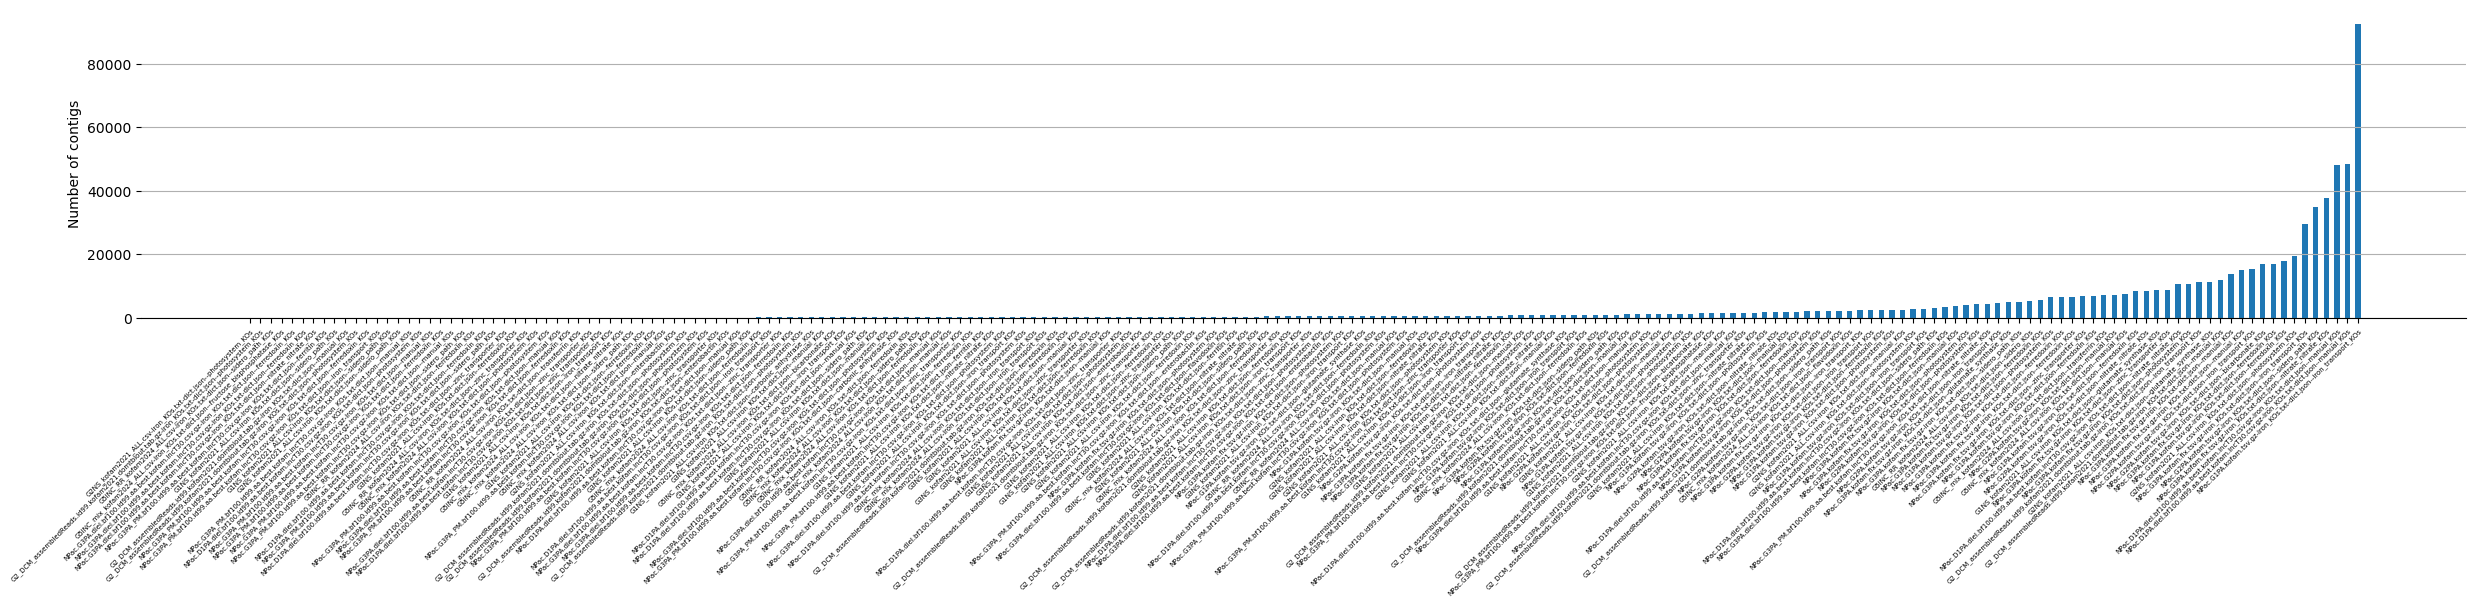

In [222]:
dims=(30,4)
ft=5
barwidth=0.5

x = np.arange(len(values_sort))

fig, ax = plt.subplots(figsize=dims)
ax.bar(x, values_sort, width=barwidth)
_ = ax.set_xticks(x)
_ = ax.set_xticklabels(labels_sort, rotation=45, size=ft, ha='right', rotation_mode='anchor')
_ = ax.spines['top'].set_visible(False)
_ = ax.spines['right'].set_visible(False)
_ = ax.spines['bottom'].set_visible(True)
_ = ax.spines['left'].set_visible(False)
# _ = ax.set_yscale('log')
_ = ax.grid(axis='y', which='major')
_ = ax.set_ylabel('Number of contigs')

plt.savefig('iron_ko_contigs/metat_search_results/plt_KO_contig_counts.png', dpi=200, bbox_inches='tight')

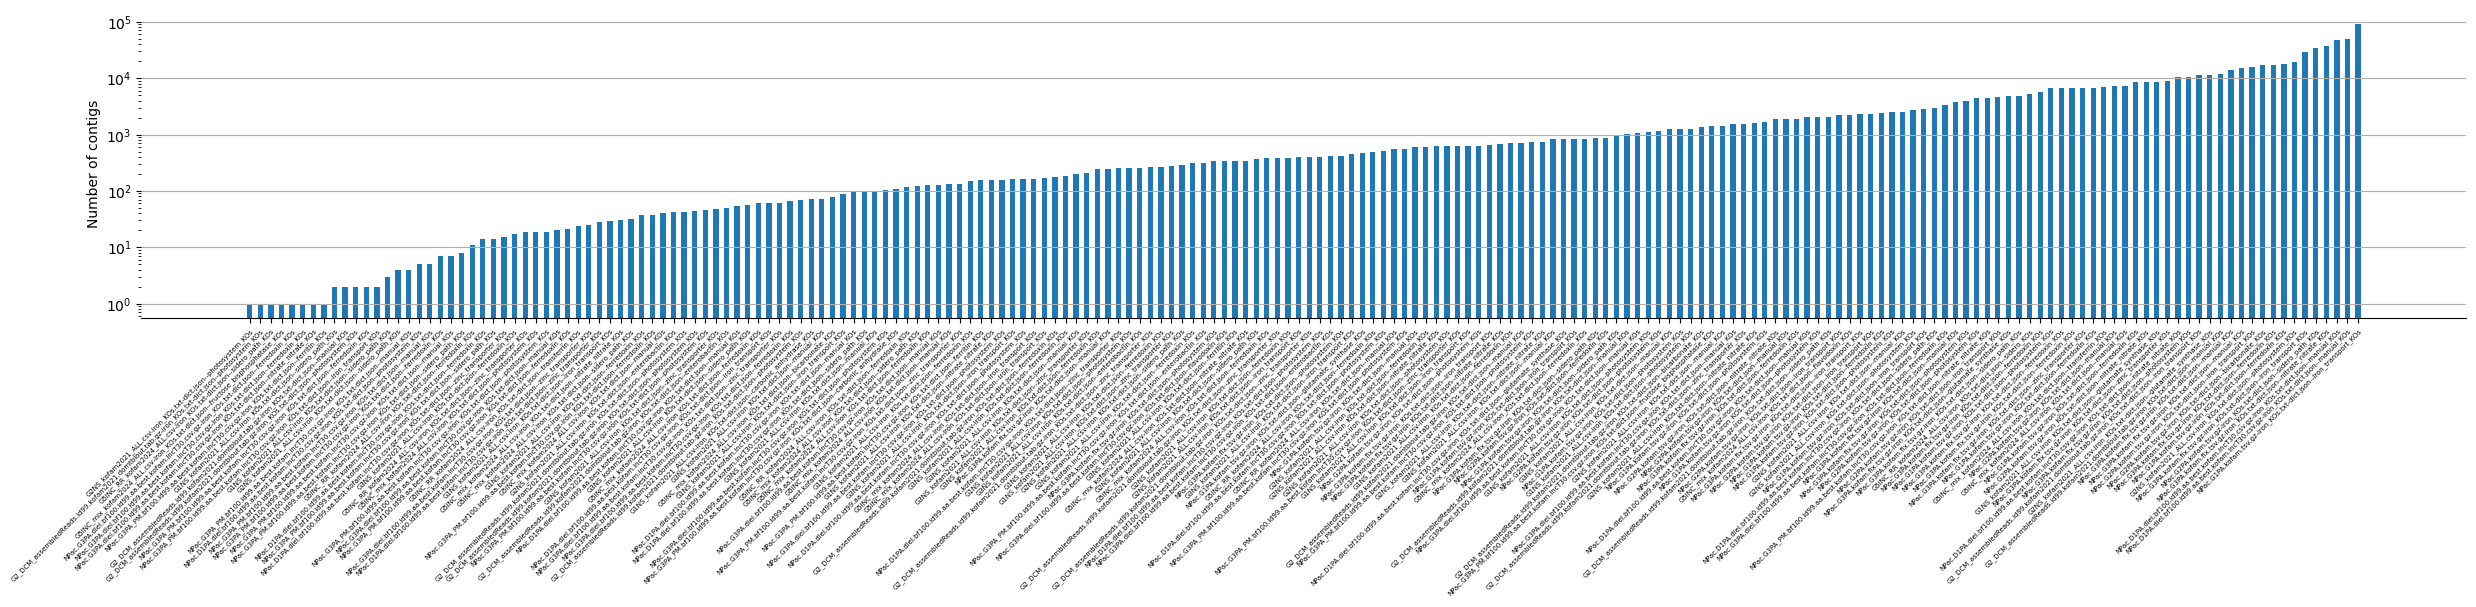

In [223]:
dims=(30,4)
ft=5
barwidth=0.5

x = np.arange(len(values_sort))

fig, ax = plt.subplots(figsize=dims)
ax.bar(x, values_sort, width=barwidth)
_ = ax.set_xticks(x)
_ = ax.set_xticklabels(labels_sort, rotation=45, size=ft, ha='right', rotation_mode='anchor')
_ = ax.spines['top'].set_visible(False)
_ = ax.spines['right'].set_visible(False)
_ = ax.spines['bottom'].set_visible(True)
_ = ax.spines['left'].set_visible(False)
_ = ax.set_yscale('log')
_ = ax.grid(axis='y', which='major')
_ = ax.set_ylabel('Number of contigs')


plt.savefig('iron_ko_contigs/metat_search_results/plt_KO_contig_counts_log.png', dpi=200, bbox_inches='tight')

Subset the KOs with large numbers of contigs

In [226]:
filter_val = 5e4

values_large = [v for v in values if v > filter_val]
labels_large = [l for l, v in zip(labels_ko,values) if v > filter_val]

len(values_large)

85

In [227]:
values_sort = sorted(values_large)
labels_sort = [x for _, x in sorted(zip(values_large, labels_large))]

values_sort[:10]
labels_sort[:2]

['NPac.G1PA.kofam.tsv.gz-iron_KOs.txt-dict.json--K15113',
 'NPac.G3PA.kofam.fix.tsv.gz-iron_KOs.txt-dict.json--K00134']

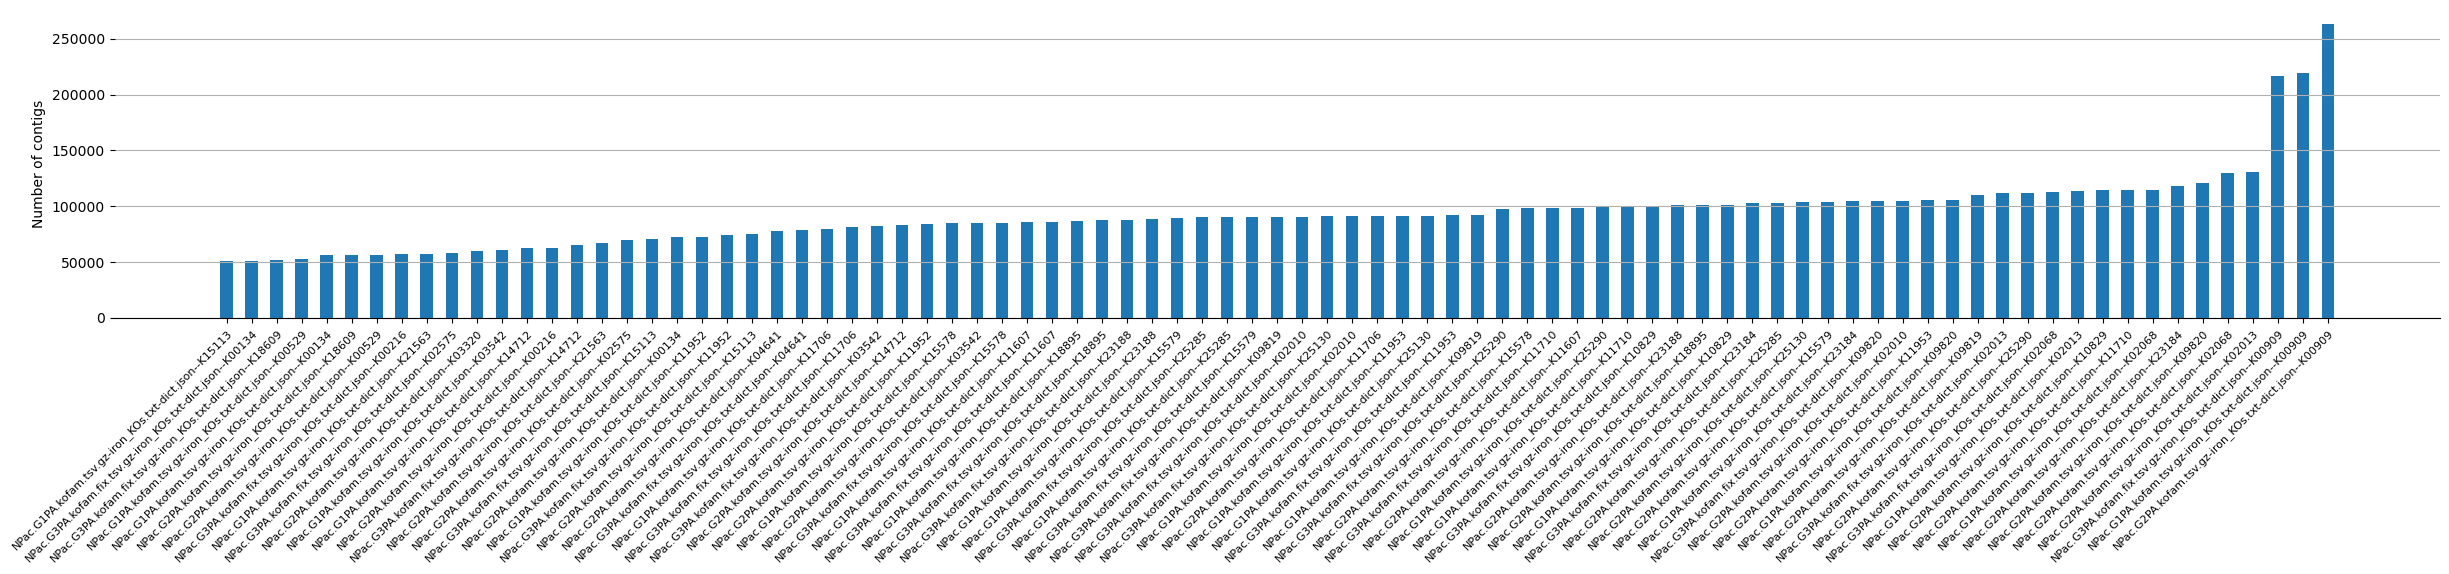

In [229]:
dims=(30,4)
ft=8
barwidth=0.5

x = np.arange(len(values_sort))

fig, ax = plt.subplots(figsize=dims)
ax.bar(x, values_sort, width=barwidth)
_ = ax.set_xticks(x)
_ = ax.set_xticklabels(labels_sort, rotation=45, size=ft, ha='right', rotation_mode='anchor')
_ = ax.spines['top'].set_visible(False)
_ = ax.spines['right'].set_visible(False)
_ = ax.spines['bottom'].set_visible(True)
_ = ax.spines['left'].set_visible(False)
# _ = ax.set_yscale('log')
_ = ax.grid(axis='y', which='major')
_ = ax.set_ylabel('Number of contigs')

# plt.savefig('iron_ko_contigs/metat_search_results/plt_KO_contig_counts.png', dpi=200, bbox_inches='tight')

How many large count KOs from each assembly?

In [234]:
dict_ass_cnt = defaultdict(lambda: 0)
for l in labels_sort:
    ass = re.split('--',l)[0]
    dict_ass_cnt[ass] += 1

dict_ass_cnt

defaultdict(<function __main__.<lambda>()>,
            {'NPac.G1PA.kofam.tsv.gz-iron_KOs.txt-dict.json': 26,
             'NPac.G3PA.kofam.fix.tsv.gz-iron_KOs.txt-dict.json': 28,
             'NPac.G2PA.kofam.tsv.gz-iron_KOs.txt-dict.json': 31})

Convert KO to description

In [235]:
for l in labels_sort:
    ko = re.split('--',l)[1]
    print(dict_ko_name[ko])

K15113  SLC25A28_37, MFRN; solute carrier family 25 (mitochondrial iron transporter), member 28/37
K00134  GAPDH, gapA; glyceraldehyde 3-phosphate dehydrogenase (phosphorylating) [EC:1.2.1.12]
K18609  pldh; pyridoxal 4-dehydrogenase [EC:1.1.1.107]
K00529  hcaD; 3-phenylpropionate/trans-cinnamate dioxygenase ferredoxin reductase component [EC:1.18.1.3]
K00134  GAPDH, gapA; glyceraldehyde 3-phosphate dehydrogenase (phosphorylating) [EC:1.2.1.12]
K18609  pldh; pyridoxal 4-dehydrogenase [EC:1.1.1.107]
K00529  hcaD; 3-phenylpropionate/trans-cinnamate dioxygenase ferredoxin reductase component [EC:1.18.1.3]
K00216  entA; 2,3-dihydro-2,3-dihydroxybenzoate dehydrogenase [EC:1.3.1.28]
K21563  dnr; CRP/FNR family transcriptional regulator, dissimilatory nitrate respiration regulator
K02575  NRT2, narK, nrtP, nasA; MFS transporter, NNP family, nitrate/nitrite transporter
K03320  amt, AMT, MEP; ammonium transporter, Amt family
K03542  psbS; photosystem II 22kDa protein
K14712  SLC39A6, LIV1, ZIP6;

Plot contig counts per ko separated by assembly

In [248]:
def barplot_val_lab_long(values, labels, ylab, err=[], title=False, log=False, dims=(30,4), ft=5, barwidth=0.1):
    x = np.arange(len(values_sort))

    fig, ax = plt.subplots(figsize=dims)
    ax.bar(x, values, width=barwidth)
    if len(err) > 0:
        ax.errorbar(x, values, fmt='none', yerr=err, capsize=barwidth*0.5)
    _ = ax.set_xticks(x)
    _ = ax.set_xticklabels(labels, rotation=45, size=ft, ha='right', rotation_mode='anchor')
    _ = ax.spines['top'].set_visible(False)
    _ = ax.spines['right'].set_visible(False)
    _ = ax.spines['bottom'].set_visible(True)
    _ = ax.spines['left'].set_visible(False)
    if log:
        _ = ax.set_yscale('log')
    if title:
        _ = ax.set_title(title)
    _ = ax.grid(axis='y', which='major')
    _ = ax.set_ylabel(ylab)
    return fig, ax

In [242]:
dpi=400
ft=3

# Check ouptut dir
out_dir = 'iron_ko_contigs/metat_search_results/plots_iron_ko_contig'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    print(f"Made dir: {out_dir}")

# loop through files
for fn in fns:
    # init lists
    labels = []
    values = []
    # Load json
    with open(fn, 'r') as f:
        dict_ko_contig = json.load(f)
    for ko, contigs in dict_ko_contig.items():
        labels.append(dict_ko_name[ko])
        values.append(len(contigs))

    fn_ = os.path.split(fn)[1]

    values_sort = sorted(values)
    labels_sort = [x for _, x in sorted(zip(values, labels))]

    # Plot standard
    fig, ax = barplot_val_lab_long(
        values_sort, 
        labels_sort, 
        'Number of contigs', 
        title=fn_,
        ft=ft
    )
    # Save
    out_fn = out_dir + '/plt_KO_contig_counts-' + fn_ + '.png'
    plt.savefig(
        out_fn,
        dpi=dpi,
        bbox_inches='tight'
    )
    print(f'Wrote: {out_fn}')
    plt.close()
    
    # Plot log
    fig, ax = barplot_val_lab_long(
        values_sort, 
        labels_sort, 
        'Number of contigs', 
        title=fn_,
        log=True,
        ft=ft
    )
    # Save
    out_fn = out_dir + '/plt_KO_contig_counts-' + fn_ + '-log.png'
    plt.savefig(
        out_fn,
        dpi=dpi,
        bbox_inches='tight'
    )
    print(f'Wrote: {out_fn}')
    plt.close()

Wrote: iron_ko_contigs/metat_search_results/plots_iron_ko_contig/plt_KO_contig_counts-NPac.G3PA.diel.bf100.id99.aa.best.kofam.incT30.csv.gz-iron_KOs.txt-dict.json.png
Wrote: iron_ko_contigs/metat_search_results/plots_iron_ko_contig/plt_KO_contig_counts-NPac.G3PA.diel.bf100.id99.aa.best.kofam.incT30.csv.gz-iron_KOs.txt-dict.json-log.png
Wrote: iron_ko_contigs/metat_search_results/plots_iron_ko_contig/plt_KO_contig_counts-G5INC_RR_kofam2024_ALL.csv-iron_KOs.txt-dict.json.png
Wrote: iron_ko_contigs/metat_search_results/plots_iron_ko_contig/plt_KO_contig_counts-G5INC_RR_kofam2024_ALL.csv-iron_KOs.txt-dict.json-log.png
Wrote: iron_ko_contigs/metat_search_results/plots_iron_ko_contig/plt_KO_contig_counts-NPac.G3PA.kofam.fix.tsv.gz-iron_KOs.txt-dict.json.png
Wrote: iron_ko_contigs/metat_search_results/plots_iron_ko_contig/plt_KO_contig_counts-NPac.G3PA.kofam.fix.tsv.gz-iron_KOs.txt-dict.json-log.png
Wrote: iron_ko_contigs/metat_search_results/plots_iron_ko_contig/plt_KO_contig_counts-G2_DCM_a

### What are the ranks of the KO contig counts across assemblies?

Build rank dict

In [243]:
dict_ko_ranks = defaultdict(list)
# loop through files
for fn in fns:
    # init lists
    labels = []
    values = []
    # Load json
    with open(fn, 'r') as f:
        dict_ko_contig = json.load(f)
    # Get list of values and labels
    for ko, contigs in dict_ko_contig.items():
        labels.append(ko)
        values.append(len(contigs))
    # sort
    labels_sort = [x for _, x in sorted(zip(values, labels), reverse=True)]    
    # ranks to dict
    for rank, ko in enumerate(labels_sort):
        dict_ko_ranks[ko].append(rank)    


Average ranks

In [245]:
labels = []
values = []
errs = []
for ko, ranks in dict_ko_ranks.items():
    labels.append(ko)
    values.append(np.mean(ranks))
    errs.append(np.std(ranks))

Plot ranks

In [250]:
ft=3
dpi=400


values_sort = sorted(values)
errs_sort = [x for _, x in sorted(zip(values, errs))]
labels_sort = [x for _, x in sorted(zip(values, labels))]
labels_sort_names = [
    dict_ko_type[ko] + '--' + dict_ko_name[ko] 
    for ko in labels_sort
]

# Plot standard
fig, ax = barplot_val_lab_long(
    values_sort, 
    labels_sort_names, 
    'Average rank', 
    ft=ft,
    err=errs_sort
)

# Check ouptut dir
out_dir = 'iron_ko_contigs/metat_search_results/plots_iron_ko_contig'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    print(f"Made dir: {out_dir}")

# Save
out_fn = out_dir + '/plt_ranks_KO_contig_count.png'
plt.savefig(
    out_fn,
    dpi=dpi,
    bbox_inches='tight'
)
print(f'Wrote: {out_fn}')
plt.close()


Wrote: iron_ko_contigs/metat_search_results/plots_iron_ko_contig/plt_ranks_KO_contig_count.png


Top 20 ranks

In [257]:
df_ranks = pd.DataFrame({'Avg. rank':values_sort, 'stdev':errs_sort}, index = labels_sort_names)

In [259]:
df_ranks[:20]

,Avg. rank,stdev
manual_KOs--K04641 bop; bacteriorhodopsin,8.250000,9.229707
"manual_KOs--K03320 amt, AMT, MEP; ammonium transporter, Amt family",12.666667,15.129074
"manual_KOs--K00134 GAPDH, gapA; glyceraldehyde 3-phosphate dehydrogenase (phosphorylating) [EC:1.2.1.12]",19.000000,11.202678
"manual_KOs--K00615 E2.2.1.1, tktA, tktB; transketolase [EC:2.2.1.1]",23.250000,14.538025
"nitrate_nitrate_KOs--K02575 NRT2, narK, nrtP, nasA; MFS transporter, NNP family, nitrate/nitrite transporter",23.250000,22.376047
glutamate_synthase_KOs--K00264 GLT1; glutamate synthase (NADH) [EC:1.4.1.14],27.166667,20.354497
nitrate_nitrate_KOs--K10534 NR; nitrate reductase (NAD(P)H) [EC:1.7.1.1 1.7.1.2 1.7.1.3],31.916667,19.176628
carbonic_anhydrase_KOs--K01674 cah; carbonic anhydrase [EC:4.2.1.1],38.333333,28.128673
"manual_KOs--K00927 PGK, pgk; phosphoglycerate kinase [EC:2.7.2.3]",38.583333,29.965142
ferredoxin_KOs--K02641 petH; ferredoxin--NADP+ reductase [EC:1.18.1.2],46.583333,25.840725


In [260]:
df_ranks[-20:]

,Avg. rank,stdev
iron_transport_KOs--K23183 fecC; ferric citrate transport system permease protein,333.750000,24.701974
"iron_transport_KOs--K25110 sirB, fecC, cbrB; iron-siderophore transport system permease protein",335.625000,26.457218
"ferredoxin_KOs--K14603 flnD2; 2'-carboxy-2,3-dihydroxybiphenyl 1,2-dioxygenase small subunit and ferredoxin fusion protein",336.400000,21.312907
iron_transport_KOs--K23185 fepB; ferric enterobactin transport system substrate-binding protein,337.111111,22.873781
"iron_transport_KOs--K25288 fhuB, ftsC, siuB; ferric hydroxamate/heme transport system permease protein",339.250000,28.895285
"iron_transport_KOs--K25111 sirC, fecD, cbrC; iron-siderophore transport system permease protein",339.500000,28.674902
nitrate_nitrate_KOs--K22962 NP7; nitrite dismutase [EC:1.7.6.1],340.250000,51.192651
sidero_path_KOs--K12241 pchG; pyochelin biosynthesis protein PchG,343.714286,15.781674
iron_transport_KOs--K23182 fecD; ferric citrate transport system permease protein,344.250000,17.159181
"nitrate_nitrate_KOs--K00373 narJ, narW; nitrate reductase molybdenum cofactor assembly chaperone NarJ/NarW",345.000000,12.961481


Sort by variance

In [262]:
errs_sort = sorted(errs, reverse=True)
values_sort = [x for _, x in sorted(zip(errs, values), reverse=True)]
labels_sort = [x for _, x in sorted(zip(errs, labels), reverse=True)]
labels_sort_names = [
    dict_ko_type[ko] + '--' + dict_ko_name[ko] 
    for ko in labels_sort
]

df_ranks = pd.DataFrame({'Avg. rank':values_sort, 'stdev':errs_sort}, index = labels_sort_names)
df_ranks[:20]

,Avg. rank,stdev
"manual_KOs--K16088 TC.FEV.OM1, fhuE, fpvA, fptA; outer-membrane receptor for ferric coprogen and ferric-rhodotorulic acid",172.888889,159.357351
"transferrin_KOs--K16087 TC.FEV.OM3, tbpA, hemR, lbpA, hpuB, bhuR, hugA, hmbR; hemoglobin/transferrin/lactoferrin receptor protein",168.818182,153.525135
manual_KOs--K15721 fyuA; pesticin/yersiniabactin receptor,169.818182,149.725092
sidero_KOs--K16090 fiu; catecholate siderophore receptor,165.545455,142.047600
iron_transport_KOs--K22737 mbfA; erythrin-vacuolar iron transport family protein,216.166667,138.206870
photosystem_KOs--K02689 psaA; photosystem I P700 chlorophyll a apoprotein A1 [EC:1.97.1.12],112.916667,138.138492
photosystem_KOs--K02690 psaB; photosystem I P700 chlorophyll a apoprotein A2 [EC:1.97.1.12],116.666667,137.105393
photosystem_KOs--K02704 psbB; photosystem II CP47 chlorophyll apoprotein,116.083333,128.206512
manual_KOs--K03147 thiC; phosphomethylpyrimidine synthase [EC:4.1.99.17],168.909091,126.405879
"sidero_KOs--K08197 ARN; MFS transporter, SIT family, siderophore-iron:H+ symporter",222.333333,124.824766
